In [ ]:
!pip install nltk
!pip install spacy 
!pip install WordCloud
!pip install gensim
import nltk
nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import models
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPooling1D, Bidirectional, Dropout
from tensorflow.keras.models import Model

##Loading DataSet From Google Drive

In [ ]:
from google.colab import drive 
drive.mount('sag')

Drive already mounted at sag; to attempt to forcibly remount, call drive.mount("sag", force_remount=True).


In [ ]:
%cd /content/sag/MyDrive
##/content/sag/MyDrive/FA-KES-Dataset.csv
data = pd.read_csv("FA-KES-Dataset.csv", encoding= 'unicode_escape')
data.shape

/content/sag/MyDrive


(804, 7)

In [ ]:
data.head(10)

,unit_id,article_title,article_content,source,date,location,labels
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,4/5/2017,idlib,0
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,4/7/2017,homs,0
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,7/10/2016,aleppo,0
5,1914947536,Suicide bombing kills at least 16 in northeast...,Tue 05 Jul 2016 Suicide bombing kills at least...,nna,7/5/2016,hasakeh,0
6,1914947537,22 dead in heavy U.S. raids on IS Syria strong...,Sun 05 Jul 2015 22 dead in heavy U.S. raids on...,nna,7/5/2015,raqqa,0
7,1914947538,Suicide bomber kills 4 in Assad clans hometown,Sun 22 Feb 2015 Suicide bomber kills 4 in Assa...,nna,2/22/2015,lattakia,0
8,1914947539,Explosion rocks down town Damascus,Sun 01 Feb 2015 Explosion rocks down town Dama...,nna,2/1/2015,damascus,1
9,1914947540,Damascus explosion due to rocket bomb,Sat 24 Aug 2013 Damascus explosion due to rock...,nna,8/24/2013,damascus,0


In [ ]:
data['original'] = data['article_title'] + ' ' + data['article_content']
data.drop('date', axis = 1)


,unit_id,article_title,article_content,source,location,labels,original
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,idlib,0,Syria attack symptoms consistent with nerve ag...
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,homs,0,Homs governor says U.S. attack caused deaths b...
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,aleppo,0,Death toll from Aleppo bomb attack at least 11...
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,aleppo,0,Aleppo bomb blast kills six Syrian state TV We...
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,aleppo,0,29 Syria Rebels Dead in Fighting for Key Alepp...
...,...,...,...,...,...,...,...
799,1965511221,Turkish Bombardment Kills 20 Civilians in Syria,28-08-2016 Turkish Bombardment Kills 20 Civili...,manar,aleppo,1,Turkish Bombardment Kills 20 Civilians in Syri...
800,1965511222,Martyrs as Terrorists Shell Aleppos Salah Eddin,17-08-2016 Martyrs as Terrorists Shell Aleppos...,manar,aleppo,1,Martyrs as Terrorists Shell Aleppos Salah Eddi...
801,1965511224,Chemical Attack Kills Five Syrians in Aleppo SANA,03-08-2016 Chemical Attack Kills Five Syrians ...,manar,aleppo,0,Chemical Attack Kills Five Syrians in Aleppo S...
802,1965511226,5 Killed as Russian Military Chopper Shot down...,01-08-2016 5 Killed as Russian Military Choppe...,manar,idlib,1,5 Killed as Russian Military Chopper Shot down...


In [ ]:
data['original'][0]

'Syria attack symptoms consistent with nerve agent use WHO Wed 05 Apr 2017 Syria attack symptoms consistent with nerve agent use WHO. Victims of a suspected chemical attack in Syria appeared to show symptoms consistent with reaction to a nerve agent the World Health Organization said on Wednesday. "Some cases appear to show additional signs consistent with exposure to organophosphorus chemicals a category of chemicals that includes nerve agents" WHO said in a statement putting the death toll at at least 70. The United States has said the deaths were caused by sarin nerve gas dropped by Syrian aircraft. Russia has said it believes poison gas had leaked from a rebel chemical weapons depot struck by Syrian bombs. Sarin is an organophosporus compound and a nerve agent. Chlorine and mustard gas which are also believed to have been used in the past in Syria are not. A Russian Defence Ministry spokesman did not say what agent was used in the attack but said the rebels had used the same chemic

##Data Cleaning 

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print (stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)       
    return result

In [ ]:
data['clean'] = data['original'].apply(preprocess)
data['clean'][0]

['syria',
 'attack',
 'symptoms',
 'consistent',
 'nerve',
 'agent',
 'syria',
 'attack',
 'symptoms',
 'consistent',
 'nerve',
 'agent',
 'victims',
 'suspected',
 'chemical',
 'attack',
 'syria',
 'appeared',
 'symptoms',
 'consistent',
 'reaction',
 'nerve',
 'agent',
 'world',
 'health',
 'organization',
 'said',
 'wednesday',
 'cases',
 'appear',
 'additional',
 'signs',
 'consistent',
 'exposure',
 'chemicals',
 'category',
 'chemicals',
 'includes',
 'nerve',
 'agents',
 'said',
 'statement',
 'putting',
 'death',
 'toll',
 'united',
 'states',
 'said',
 'deaths',
 'caused',
 'sarin',
 'nerve',
 'dropped',
 'syrian',
 'aircraft',
 'russia',
 'said',
 'believes',
 'poison',
 'leaked',
 'rebel',
 'chemical',
 'weapons',
 'depot',
 'struck',
 'syrian',
 'bombs',
 'sarin',
 'organophosporus',
 'compound',
 'nerve',
 'agent',
 'chlorine',
 'mustard',
 'believed',
 'past',
 'syria',
 'russian',
 'defence',
 'ministry',
 'spokesman',
 'agent',
 'attack',
 'said',
 'rebels',
 'chemical'

In [ ]:
list_of_words = []
for row in data.clean:
    for word in row:
        list_of_words.append(word)

In [ ]:
print(len(list_of_words))
unique_words_count = len(list(set(list_of_words)))
print(unique_words_count)

141404
9013


In [ ]:

data['clean_joined'] = data['clean'].apply(lambda x: " ".join(x))
data.head(10)

,unit_id,article_title,article_content,source,date,location,labels,original,clean,clean_joined
0,1914947530,Syria attack symptoms consistent with nerve ag...,Wed 05 Apr 2017 Syria attack symptoms consiste...,nna,4/5/2017,idlib,0,Syria attack symptoms consistent with nerve ag...,"[syria, attack, symptoms, consistent, nerve, a...",syria attack symptoms consistent nerve agent s...
1,1914947532,Homs governor says U.S. attack caused deaths b...,Fri 07 Apr 2017 at 0914 Homs governor says U.S...,nna,4/7/2017,homs,0,Homs governor says U.S. attack caused deaths b...,"[homs, governor, says, attack, caused, deaths,...",homs governor says attack caused deaths doesnt...
2,1914947533,Death toll from Aleppo bomb attack at least 112,Sun 16 Apr 2017 Death toll from Aleppo bomb at...,nna,4/16/2017,aleppo,0,Death toll from Aleppo bomb attack at least 11...,"[death, toll, aleppo, bomb, attack, death, tol...",death toll aleppo bomb attack death toll alepp...
3,1914947534,Aleppo bomb blast kills six Syrian state TV,Wed 19 Apr 2017 Aleppo bomb blast kills six Sy...,nna,4/19/2017,aleppo,0,Aleppo bomb blast kills six Syrian state TV We...,"[aleppo, bomb, blast, kills, syrian, state, al...",aleppo bomb blast kills syrian state aleppo bo...
4,1914947535,29 Syria Rebels Dead in Fighting for Key Alepp...,Sun 10 Jul 2016 29 Syria Rebels Dead in Fighti...,nna,7/10/2016,aleppo,0,29 Syria Rebels Dead in Fighting for Key Alepp...,"[syria, rebels, dead, fighting, aleppo, road, ...",syria rebels dead fighting aleppo road syria r...
5,1914947536,Suicide bombing kills at least 16 in northeast...,Tue 05 Jul 2016 Suicide bombing kills at least...,nna,7/5/2016,hasakeh,0,Suicide bombing kills at least 16 in northeast...,"[suicide, bombing, kills, northeast, syria, su...",suicide bombing kills northeast syria suicide ...
6,1914947537,22 dead in heavy U.S. raids on IS Syria strong...,Sun 05 Jul 2015 22 dead in heavy U.S. raids on...,nna,7/5/2015,raqqa,0,22 dead in heavy U.S. raids on IS Syria strong...,"[dead, heavy, raids, syria, stronghold, dead, ...",dead heavy raids syria stronghold dead heavy r...
7,1914947538,Suicide bomber kills 4 in Assad clans hometown,Sun 22 Feb 2015 Suicide bomber kills 4 in Assa...,nna,2/22/2015,lattakia,0,Suicide bomber kills 4 in Assad clans hometown...,"[suicide, bomber, kills, assad, clans, hometow...",suicide bomber kills assad clans hometown suic...
8,1914947539,Explosion rocks down town Damascus,Sun 01 Feb 2015 Explosion rocks down town Dama...,nna,2/1/2015,damascus,1,Explosion rocks down town Damascus Sun 01 Feb ...,"[explosion, rocks, town, damascus, explosion, ...",explosion rocks town damascus explosion rocks ...
9,1914947540,Damascus explosion due to rocket bomb,Sat 24 Aug 2013 Damascus explosion due to rock...,nna,8/24/2013,damascus,0,Damascus explosion due to rocket bomb Sat 24 A...,"[damascus, explosion, rocket, bomb, damascus, ...",damascus explosion rocket bomb damascus explos...


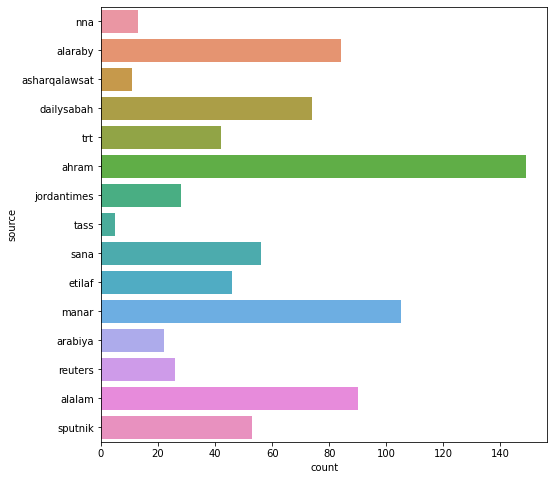

In [ ]:
plt.figure(figsize = (8, 8))
sns.countplot(y = "source", data = data)

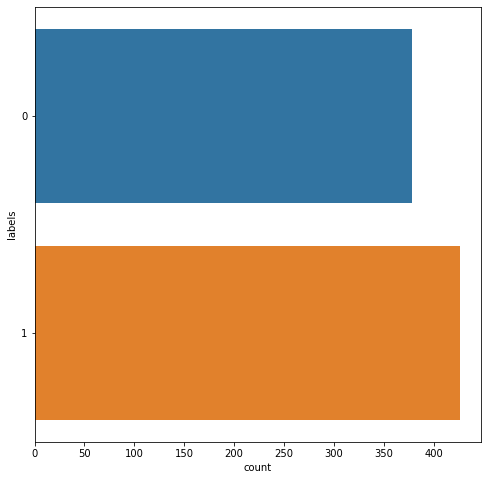

In [ ]:
plt.figure(figsize = (8, 8))
sns.countplot(y = "labels", data = data)

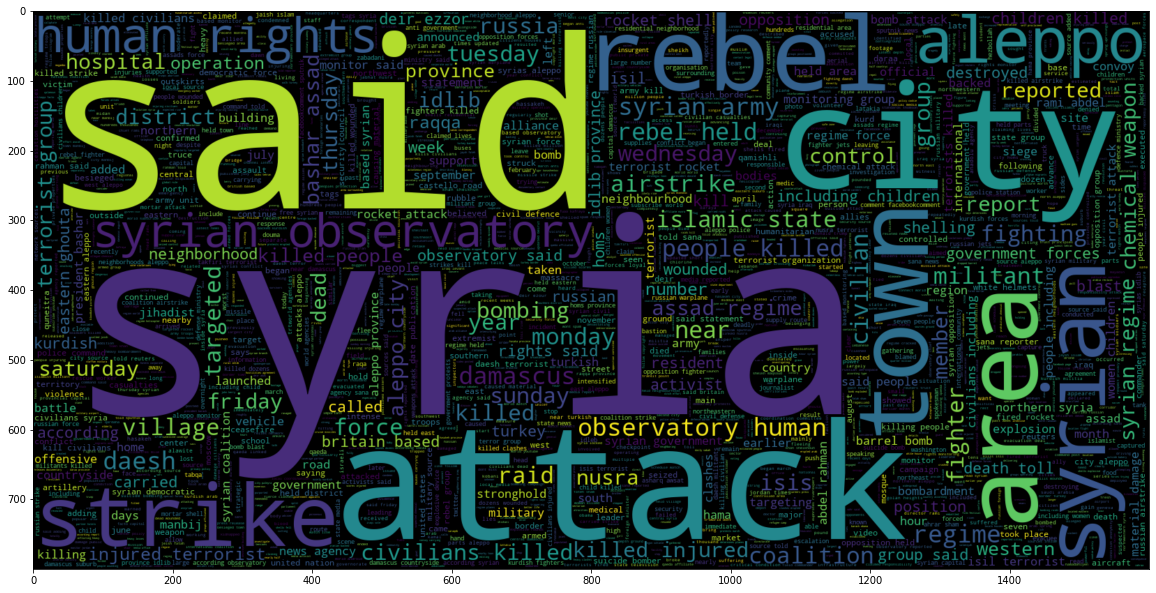

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(data[data.labels == 1].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

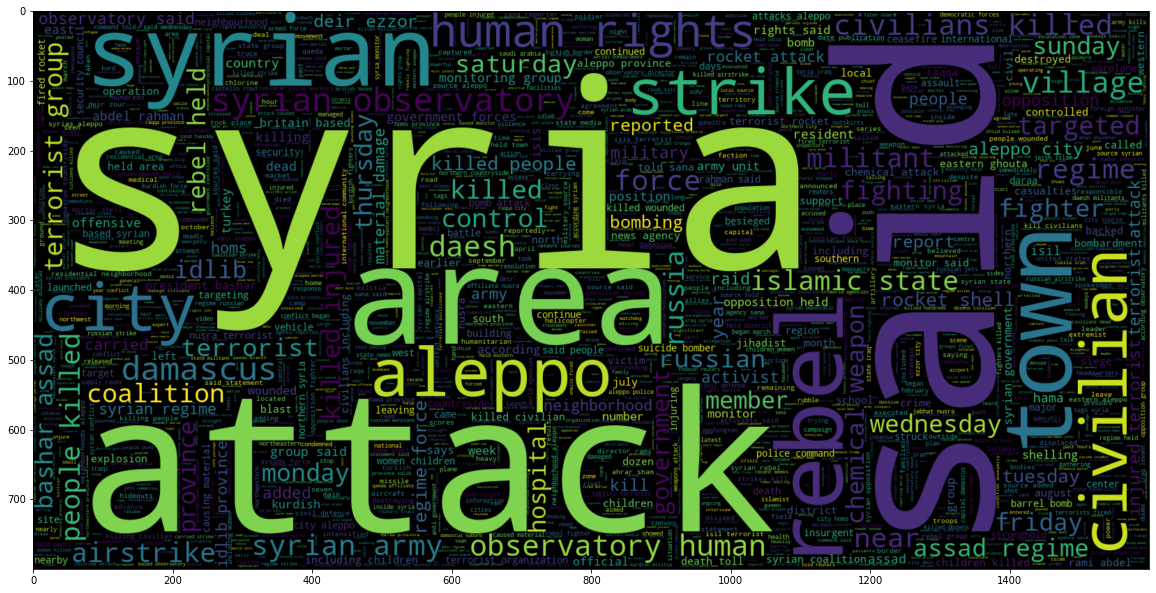

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(data[data.labels == 0].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

In [ ]:
maxlen = -1
for doc in data.clean_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is =", maxlen)

The maximum number of words in any document is = 799



##Split Data into Train and Test 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.clean_joined, data.labels, test_size = 0.2)

In [ ]:
from nltk import word_tokenize
tokenizer = Tokenizer(num_words = unique_words_count)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [ ]:
print("The encoding for document\n",data.clean_joined[0],"\n is : ",train_sequences[0])

The encoding for document
 syria attack symptoms consistent nerve agent syria attack symptoms consistent nerve agent victims suspected chemical attack syria appeared symptoms consistent reaction nerve agent world health organization said wednesday cases appear additional signs consistent exposure chemicals category chemicals includes nerve agents said statement putting death toll united states said deaths caused sarin nerve dropped syrian aircraft russia said believes poison leaked rebel chemical weapons depot struck syrian bombs sarin organophosporus compound nerve agent chlorine mustard believed past syria russian defence ministry spokesman agent attack said rebels chemical weapons aleppo year said likely kind chemical attack sufferers apparent external injuries died rapid onset similar symptoms including acute respiratory distress said experts turkey giving guidance overwhelmed health workers idlib diagnosis treatment patients medicines atropine antidote types chemical exposure ster

In [ ]:
# Adding Padding
padded_train = pad_sequences(train_sequences,maxlen = 300, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 300, truncating = 'post') 


##Build the Hybrid Model

In [ ]:
def My_Model_Hybrid (input_shape, unique_words_count):
      X_input = Input(input_shape)
      X = Embedding(unique_words_count, output_dim = 300) (X_input)
      print(X)

      X = Conv1D(128, 5,  padding="same", activation = 'relu') (X)
      X = MaxPooling1D(pool_size=2)(X)

      X =LSTM(32)(X)
      ##X = Dense(32, activation="relu")(X)
      X = Dense (1, activation="sigmoid")(X) 
      model = models.Model(inputs = X_input, outputs = X)
      return model


BATCH_SIZE = 64
EPOCHS = 10

model = My_Model_Hybrid(300, unique_words_count)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()


KerasTensor(type_spec=TensorSpec(shape=(None, 300, 300), dtype=tf.float32, name=None), name='embedding/embedding_lookup/Identity_1:0', description="created by layer 'embedding'")
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding (Embedding)       (None, 300, 300)          2703900   
                                                                 
 conv1d (Conv1D)             (None, 300, 128)          192128    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 150, 128)         0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 32)                20608     
              

In [ ]:
history = model.fit(padded_train, y_train, batch_size =BATCH_SIZE,validation_split = 0.1, epochs = EPOCHS)


Epoch 1/10
10/10 [==============================] - 9s 622ms/step - loss: 0.7018 - acc: 0.5104 - val_loss: 0.6935 - val_acc: 0.5077
Epoch 2/10
10/10 [==============================] - 6s 552ms/step - loss: 0.6839 - acc: 0.5554 - val_loss: 0.6947 - val_acc: 0.5077
Epoch 3/10
10/10 [==============================] - 5s 541ms/step - loss: 0.6752 - acc: 0.5865 - val_loss: 0.6961 - val_acc: 0.5231
Epoch 4/10
10/10 [==============================] - 5s 542ms/step - loss: 0.6522 - acc: 0.5900 - val_loss: 0.6870 - val_acc: 0.5231
Epoch 5/10
10/10 [==============================] - 5s 546ms/step - loss: 0.6197 - acc: 0.5934 - val_loss: 0.6880 - val_acc: 0.5385
Epoch 6/10
10/10 [==============================] - 5s 531ms/step - loss: 0.6078 - acc: 0.6038 - val_loss: 0.7076 - val_acc: 0.5231
Epoch 7/10
10/10 [==============================] - 5s 541ms/step - loss: 0.6030 - acc: 0.5830 - val_loss: 0.7116 - val_acc: 0.4923
Epoch 8/10
10/10 [==============================] - 5s 539ms/step - loss: 0.

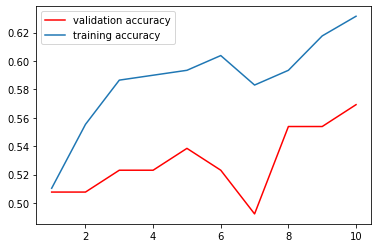

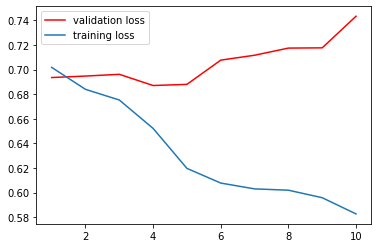

In [ ]:
epoch = [1,2,3,4,5,6,7,8,9,10]

plt.plot(epoch, history.history["val_acc"], color = 'r')
plt.plot(epoch, history.history["acc"])
plt.legend(['validation accuracy', 'training accuracy'])
plt.show()

plt.plot(epoch, history.history["val_loss"], color = 'r')
plt.plot(epoch, history.history["loss"])
plt.legend(['validation loss', 'training loss'])
plt.show()

In [ ]:
# Making prediction
pred = model.predict(padded_test)

6/6 [==============================] - 2s 113ms/step


In [52]:
# If The Predicted Value Is >0.90 (i.e., More Than 90%), It Is Real Else It Is Fake
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.90:
        prediction.append(1)
    else:
        prediction.append(0)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

accuracy = accuracy_score(list(y_test), prediction)
precision = precision_score(list(y_test), prediction)
recall = recall_score(list(y_test), prediction)
f1score = f1_score(list(y_test), prediction)

#
print("Model Accuracy : \n", accuracy)
print("\n")
print("Model Precision : \n", precision)
print("\n")
print("Model Recall : \n", recall)
print("\n")
print("Model F1 Score : \n", f1score)

Model Accuracy : 
 0.515527950310559


Model Precision : 
 0.55


Model Recall : 
 0.2682926829268293


Model F1 Score : 
 0.36065573770491804


##Build the RNN Model

In [ ]:
def My_Model_RNN (input_shape, unique_words_count):
      X_input = Input(input_shape)
      X = Embedding(unique_words_count, output_dim = 300) (X_input)
      print(X)
      X =LSTM(32)(X)
      ##X = Dense(32, activation="relu")(X)
      X = Dense (1, activation="sigmoid")(X) 
      model = models.Model(inputs = X_input, outputs = X)
      return model


BATCH_SIZE = 64
EPOCHS = 10

model2 = My_Model_RNN(300, unique_words_count)
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model2.summary()


KerasTensor(type_spec=TensorSpec(shape=(None, 300, 300), dtype=tf.float32, name=None), name='embedding_1/embedding_lookup/Identity_1:0', description="created by layer 'embedding_1'")
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 300, 300)          2703900   
                                                                 
 lstm_1 (LSTM)               (None, 32)                42624     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,746,557
Trainable params: 2,746,557
Non-trainable params: 0
________________________________________________________________

In [ ]:
history = model2.fit(padded_train, y_train, batch_size =BATCH_SIZE,validation_split = 0.1, epochs = EPOCHS)


Epoch 1/10
10/10 [==============================] - 6s 426ms/step - loss: 0.6942 - acc: 0.5242 - val_loss: 0.6933 - val_acc: 0.5231
Epoch 2/10
10/10 [==============================] - 4s 368ms/step - loss: 0.6879 - acc: 0.5900 - val_loss: 0.6931 - val_acc: 0.4923
Epoch 3/10
10/10 [==============================] - 4s 369ms/step - loss: 0.6865 - acc: 0.5415 - val_loss: 0.6927 - val_acc: 0.4923
Epoch 4/10
10/10 [==============================] - 5s 567ms/step - loss: 0.6832 - acc: 0.5363 - val_loss: 0.6933 - val_acc: 0.4923
Epoch 5/10
10/10 [==============================] - 4s 398ms/step - loss: 0.6771 - acc: 0.5381 - val_loss: 0.6911 - val_acc: 0.5231
Epoch 6/10
10/10 [==============================] - 4s 365ms/step - loss: 0.6659 - acc: 0.5917 - val_loss: 0.6985 - val_acc: 0.5231
Epoch 7/10
10/10 [==============================] - 4s 364ms/step - loss: 0.6622 - acc: 0.5917 - val_loss: 0.7005 - val_acc: 0.5231
Epoch 8/10
10/10 [==============================] - 4s 363ms/step - loss: 0.

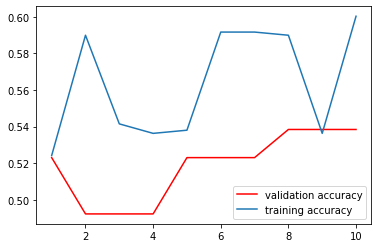

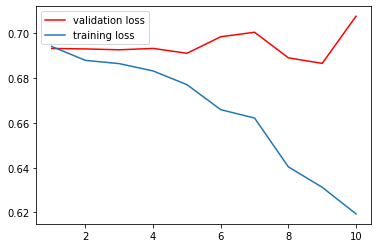

In [ ]:

plt.plot(epoch, history.history["val_acc"], color = 'r')
plt.plot(epoch, history.history["acc"])
plt.legend(['validation accuracy', 'training accuracy'])
plt.show()

plt.plot(epoch, history.history["val_loss"], color = 'r')
plt.plot(epoch, history.history["loss"])
plt.legend(['validation loss', 'training loss'])
plt.show()

In [ ]:
# Making prediction
pred2 = model2.predict(padded_test)

6/6 [==============================] - 1s 37ms/step


In [50]:
# If The Predicted Value Is >0.95 (i.e., More Than 85%), It Is Real Else It Is Fake
prediction2 = []
for i in range(len(pred2)):
    if pred2[i].item() > 0.82:
        prediction2.append(1)
    else:
        prediction2.append(0)

In [51]:

accuracy2 = accuracy_score(list(y_test), prediction2)
precision2 = precision_score(list(y_test), prediction2)
recall2 = recall_score(list(y_test), prediction2)
f1score2 = f1_score(list(y_test), prediction2)


print("Model Accuracy : \n", accuracy2)
print("\n")
print("Model Precision : \n", precision2)
print("\n")
print("Model Recall : \n", recall2)
print("\n")
print("Model F1 Score : \n", f1score2)

Model Accuracy : 
 0.4906832298136646


Model Precision : 
 0.5


Model Recall : 
 0.024390243902439025


Model F1 Score : 
 0.046511627906976744
